# Visualise Netflix Data With Analytical SQL

Netflix is a streaming service that allows its customers to watch a wide variety of video entertainment on thousands of Internet-connected devices. It is a direct-to-consumer subscription video service.

One key factor behind Netflix's success was innovation. The first time Netflix innovated was when they were shipping DVDs via mail. Then they abolished late fees which lead to Blockbuster’s crush and burn demise. After that they transitioned from mailing content to streaming movies and TV shows digitally and finally, Netflix began producing its own original content.

Netflix is successful because it keeps its subscribers’ needs at heart. Its co-founders were courageous enough to steer the ship in a different direction than the industry and teach their teams to live by the business strategy of adapt and adopt.

It might not be obvious that the company’s transformations are supported by technology innovations. That being said, Netflix is not an entertainment company, it is a technology company, much like Amazon, Google or Facebook. Some of the ways they’ve used big data and analytics include:

* Customer segmentation: Each viewer’s experience with the platform is unique, tailored to their viewing habits, interests, and interaction with the platform.
* Offer a tailored experience: Netflix is able to offer each subscriber content that HE/SHE wants to watch via a personalized recommended engine. This motivates viewers to return and watch more content with excitement.
* Predicting the future: Understanding which genres, themes, and content formats are most likely to prove a hit. Netflix also has a proven track record of identifying and targeting users who are attracted to certain touchpoints so they were confident they could successfully market it.

Netflix has grown to the size it is today thanks to the help of individuals passionate about diving deep into data. Some of Netflix’s data is built from information that users voluntarily provide, like their name, address, e-mail, payment method, and content reviews. Netflix itself automatically collects other forms of data, such as the platform used to watch Netflix, a user’s watch history, search queries, and time spent watching a show. The company also collects some bits of data from other sources, such as demographic data, interest-based data, and Internet browsing behavior. Then data scientists build models and data engineers develop technical solutions to improve data usage and data access, so that data are indeed put into actions.










# Preparation

We'll use the following modules:

* `asqlcell` for data analytics with SQL statements in a performant way.
* `pandas` for data manipulation.
* `matplotlib` and `seaborn` for data visualization.

We can install these modules as follows:

In [15]:
!pip install asqlcell matplotlib pandas seaborn --upgrade

Looking in indexes: https://mirrors.cloud.tencent.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.6 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 7.9 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 6.6 MB/s eta 0:00:006.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 7.7 MB/s eta 0:00:007.9 MB/s eta 0:00:01
  Using cached https://mirrors.cloud.tencent.com/pypi/packages/6c/10/a7d0fa5baea8fe7b50f448ab742f26f52b80bfca85ac2be9d35cdd9a3246/pyparsing-3.0.9-py3-none-any.whl (98 kB)


Now we can import these modules:

In [18]:
import asqlcell
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

%load_ext asqlcell

Also we can config the theme for seaborn by setting its palette. We can also 

In [16]:
sns.set_theme(palette='pastel')

%matplotlib inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

Now we are ready to proceed with the data analytics.

# Data

Kaggle provides a dataset about [Netflix Movies and TV Shows](https://www.kaggle.com/code/arvinthsss/sql-syntax-series-using-netflix-dataset/data) which consists of listings of all the movies and tv shows available on Netflix as of mid-2021, along with details such as cast, directors, ratings, release year, duration, etc. This dataset is licensed under CC0: Public Domain. We can leverage this dataset to understand Netflix’s history and goals, the target market, and the existing product.

This dataset is stored in CSV file. Instead of using pandas, we can use analytical sql to load data needed for probing:

In [20]:
%%sql

SELECT *
FROM 'netflix.csv.gz'
LIMIT 100

SqlCellWidget(chart_config='{"type": null, "x": null, "y": null, "color": null, "theta": null, "aggregation": …

Here `%%sql` is a cell magic indicating that the cell block should be executed as SQL statement. Magic are special commands to add functionalities that are not straight forward to achieve with jupyter notebook interface.

In the SQL statement we specify the CSV file in `FROM` clause. Keep in mind that you can use compressed CSV files e.g. a gzipped file such as `netflix.csv.gz` will work just fine.

# Data Observation

Next, we explore the data to gain insights into our dataset.

## Country



Let's check the top 10 countries as contributors to Netflix as follows:

In [21]:
%%sql distribution_of_country

SELECT
    country,
    count(*) AS count
FROM 'netflix.csv.gz'
WHERE country IS NOT NULL
GROUP BY country
ORDER BY count
DESC
LIMIT 10

alt.Chart(...)

SqlCellWidget(chart_config='{"type": null, "x": null, "y": null, "color": null, "theta": null, "aggregation": …

We can also visualize the result set by clicking the Chart tab with the following settings:

* Chart type: Pie
* Size: count
* Color: country

Also you can specify the width and hight of the chart in the Display tab.

If you're happy with the result, you can also click the `Pin` button to persist the result in the notebook. In this way, your colleague will be able to see the chart after receiving your notebook (without starting a kernel).

The result can be better visualized as a pie chart:

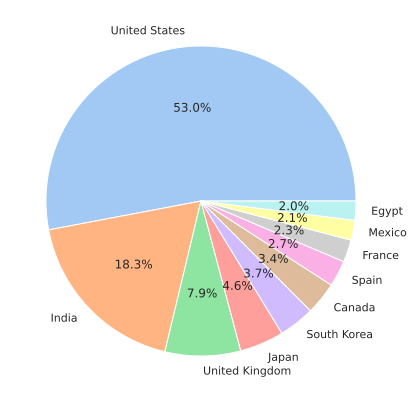

In [22]:
plt.figure(figsize = (7, 7))
plt.pie(distribution_of_country['count'], labels=distribution_of_country['country'], autopct='%1.1f%%')
plt.show()

The United States has the highest contributor with 45.9% of videos on Netflix. India surprisingly ranks second with 15.8%, followed by United Kingdom with 6.8%.

## Types

Let's investigate the types and their total numbers in the dataset:

In [26]:
%%sql distribution_of_type

SELECT
    type,
    count(type) AS count
FROM 'netflix.csv.gz'
GROUP BY type

alt.Chart(...)

SqlCellWidget(chart_config='{"type": null, "x": null, "y": null, "color": null, "theta": null, "aggregation": …

We can plot a pie chart to compare the types of videos that Netflix offers. Here seaborn is used to provide a pleasant theme of the visual:

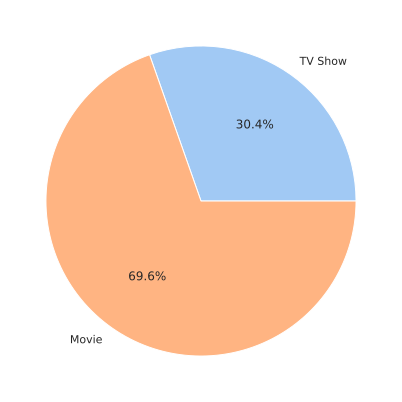

In [25]:
plt.figure(figsize = (7, 7))
plt.pie(distribution_of_type['count'], labels=distribution_of_type['type'], autopct='%1.1f%%')
plt.show()

We can see that Movie has a viewers rate of 69.6% which is much higher than that of TV Shows which is 30.4%. It is clear that Netflix viewers explore more Movies than TV Shows overall.

However, is this still true over the years? Let's add release year as one more dimension:

In [27]:
%%sql distribution_of_type_over_year

SELECT
    release_year,
    count(*) FILTER (WHERE type = 'Movie') AS movie,
    count(*) FILTER (WHERE type = 'TV Show') AS tv,
FROM 'netflix.csv.gz'
GROUP BY release_year
ORDER BY release_year

SqlCellWidget(chart_config='{"type": null, "x": null, "y": null, "color": null, "theta": null, "aggregation": …

In [36]:
%%sql distribution_of_type_over_year

SELECT
    release_year,
    type,
    COUNT(type) AS count,
FROM 'netflix.csv.gz'
GROUP BY release_year, type
ORDER BY release_year

SqlCellWidget(cache='{"tabValue":"chart"}', chart_config='{"type":"column","x":"release_year","y":"type","colo…

Here we use `FILTER` clause to filter the rows of data that are of type Movie or TV Show group by release year. In fact, `FILTER` clause is quite similar to `WHERE` clause when filtering rows, but localized to the specific aggregate function.

The result set is saved in a dataframe named `distribution_of_type_over_year`.

Now we can visualize the result with stacked bar chart:

<Axes: xlabel='release_year'>

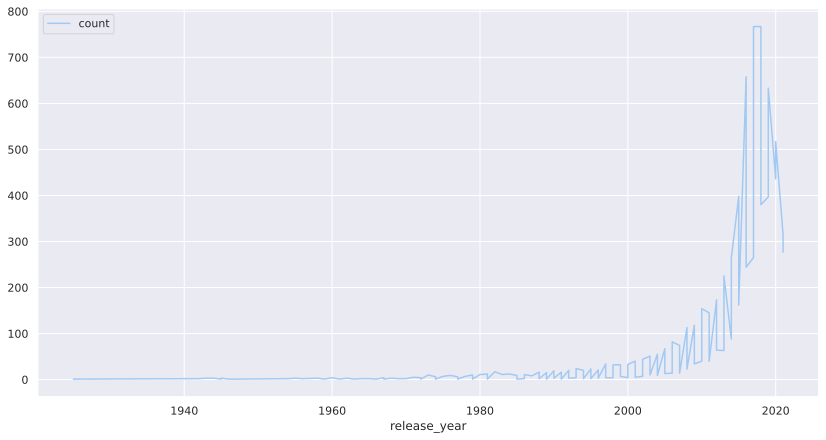

In [47]:
distribution_of_type_over_year.plot(kind='line', x='release_year', stacked=True, figsize=(14, 7))

Now we can see that **Netflix releases more and more TV shows in recent years**, in 2021 there are in fact 315 TV shows compared with 277 for movies. If you have watched Stranger Things and Squid Game, you may agree that Netflix is better at making great TV shows than movies :-)

## Genre

In order to understand what people want to watch, we can analyze the genre of movies and TV shows.

This might not be very straightforward at the first glance, as the dataset only provides a column of text with the genres that the video is listed in concatenated by comma. For example, the value of Blood & Water International is `International TV Shows, TV Dramas, TV Mysteries`, meaning the video is listed in TV Shows, TV Dramas and TV Mysteries.

Luckily, we an leverage `split` function to get the list of genres separated by comma, and then use `unnest` to unnest the list of genres by one level. In this way, we can get three rows for Blood & Water with each a different genre. That said, `unnest` is a scalar function that can change the cardinality of the result with one tuple per entry in the list.

Here is the SQL statement to wrangle the original data into the desired form. As mentioned before, the result set is stored in a dataframe named `distribution_of_genre`:

In [37]:
%%sql distribution_of_genre

SELECT
    type,
    title,
    unnest(split(listed_in, ', ')) AS genre
FROM 'netflix.csv.gz'
LIMIT 100

SqlCellWidget(chart_config='{"type": null, "x": null, "y": null, "color": null, "theta": null, "aggregation": …

Now we can further investigate dataframe `distribution_of_genre` for more observations.

First, let us count the number of each genre of all the movies and limit to the top tweenty:

In [38]:
%%sql distribution_of_movie_genre

SELECT
    genre,
    count(genre) AS count
    FROM distribution_of_genre
WHERE type= 'Movie'
GROUP BY genre
ORDER BY count DESC
LIMIT 10

SqlCellWidget(chart_config='{"type": null, "x": null, "y": null, "color": null, "theta": null, "aggregation": …

You may have noticed that in the SQL statement above, the `FROM` clause actually specifies the dataframe on which the remainder of the query should operate. This means that analytical SQL not only can save result set as dataframe, it can also consume and operate data from dataframe! In this way we are able to  interleave Python and SQL to get the most out of the two technologies 😎 

Now we ca visualize the result set with bar chart:

<Axes: xlabel='count', ylabel='genre'>

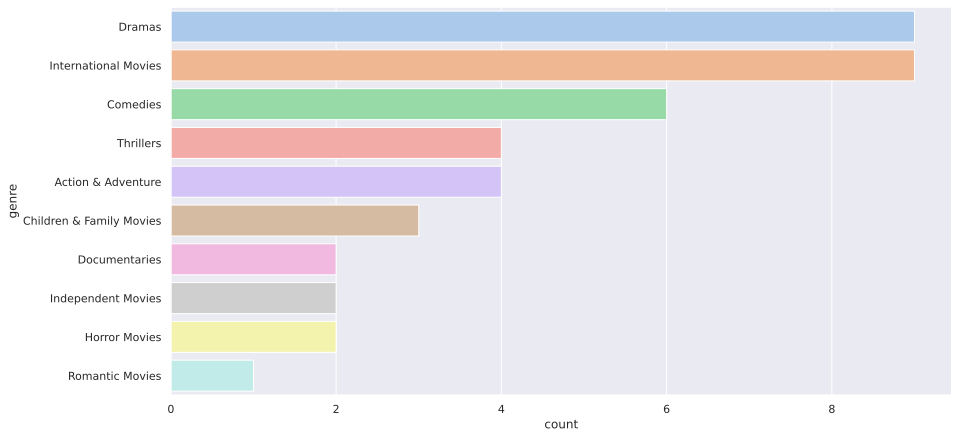

In [39]:
plt.figure(figsize = (14, 7))

sns.barplot(data=distribution_of_movie_genre, x="count", y='genre')

We can see International Movies (2752) has the highest genre rate of movies users explore on Netflix, followed by Dramas (2427) and Comedies (1674).

Next, let us count the number of each genre of all the TV shows and also limit to the top tweenty:

In [40]:
%%sql distribution_of_tv_genre

SELECT
    genre,
    count(*) AS count
FROM (
    SELECT
        title,
        unnest(split(listed_in, ', ')) AS genre
    FROM 'netflix.csv.gz'
    WHERE type= 'TV Show'
)
GROUP BY genre
ORDER BY count DESC
LIMIT 10

SqlCellWidget(chart_config='{"type": null, "x": null, "y": null, "color": null, "theta": null, "aggregation": …

Now we can visualize the result set as follows:

<Axes: xlabel='count', ylabel='genre'>

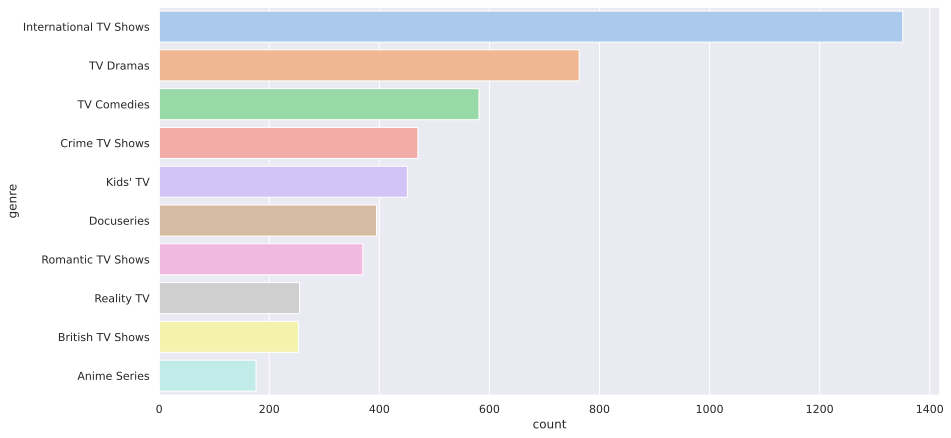

In [41]:
plt.figure(figsize = (14, 7))

sns.barplot(data=distribution_of_tv_genre, x="count", y='genre')

We can see International TV Shows (1351) has the highest genre rate of TV shows users explore on Netflix, followed by TV Dramas (763) and TV Comedies (581).

It is interesting that international, dramas and comedies are very welcome for both movie and TV show.

## Rating

The film rating system is used in the United States to rate a motion picture's suitability for certain audiences based on its content.

The MPA film ratings are as follows:

* G – General Audiences
* PG – Parental Guidance Suggested
* PG-13 – Parents Strongly Cautioned
* R – Restricted
* NC-17 – Adults Only
* NR - Not Rated
* UR - Unrated

We can leverage `IN` clause to filter out the videos with film ratings:

In [42]:
%%sql distribution_of_movie_rating

SELECT
    rating,
    count(*) as count
FROM 'netflix.csv.gz'
GROUP BY rating
HAVING rating IN ('G', 'PG', 'PG-13', 'R', 'NC-17', 'NR', 'UR')
ORDER BY count
DESC

SqlCellWidget(chart_config='{"type": null, "x": null, "y": null, "color": null, "theta": null, "aggregation": …

Now we can visualize the data with categorical plots which involve a variable representing categories. This type of plots are commonly used when we want to make comparisons between different groups.

/home/qizh/anaconda3/envs/asqlcell/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x700 with 0 Axes>

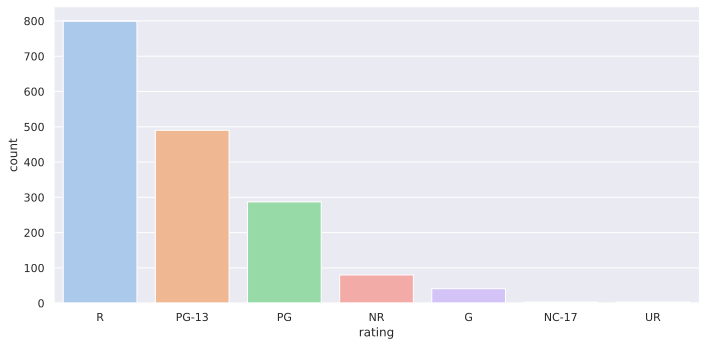

In [43]:
plt.figure(figsize = (14, 7))
sns.catplot(x='rating', y='count', data=distribution_of_movie_rating, kind='bar', aspect=2)
plt.show()

We can conclude from the findings that Netflix majorly comprises videos rated R, PG-13 and PG.

Similarly, television content rating systems are systems for evaluating the content and reporting the suitability of television programs. Many countries have their own television rating system, here is the system used in United States:

* TV-Y – This program is aimed at a very young audience, including children from ages 2–6.
* TV-Y7 – This program is designed for children age 7 and above.
* TV-G – Most parents would find this program suitable for all ages.
* TV-PG – Parental guidance is recommended.
* TV-14 – This program contains some material that many parents would find unsuitable for children under 14 years of age.
* TV-MA – This program is intended to be viewed by adults and therefore may be unsuitable for children under 17.

We can leverage `IN` clause to filter out the videos with film ratings:

In [44]:
%%sql distribution_of_tv_rating

SELECT
    rating,
    count(*) as count
FROM 'netflix.csv.gz'
GROUP BY rating
HAVING rating IN ('TV-Y7', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA')
ORDER BY count
DESC

SqlCellWidget(chart_config='{"type": null, "x": null, "y": null, "color": null, "theta": null, "aggregation": …

The comparison can be visualized as follows:

/home/qizh/anaconda3/envs/asqlcell/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x700 with 0 Axes>

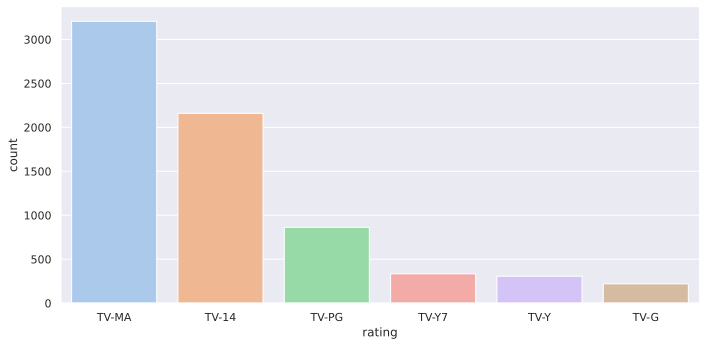

In [45]:
plt.figure(figsize = (14, 7))
sns.catplot(x='rating', y='count', data=distribution_of_tv_rating, kind='bar', aspect=2)
plt.show()

We can conclude from the findings that Netflix majorly comprises videos rated TV-MA, TV-14 and TV-PG.